In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/dan1dr/microdosing/main/data/wide.csv'
data = pd.read_csv('./wide.csv', sep=',', index_col=0)
pd.options.display.max_columns = None

In [3]:
data.head()

,ResponseId,StartDate,EndDate,RecordedDate,Angry,Distressed,Afraid,Frustrated,Nervous,Alarmed,Tense,Annoyed,Astonished,Excited,Alert,Delighted,Amused,Glad,Happy,Pleased,Sad,Miserable,Depressed,Droopy,Gloomy,Fatigued,Bored,Tired,Serene,Content,Calm,At ease,Satisfied,Relaxed,Sleepy,Quiet,Current,Reddit,Country,Age,Gender,Orientation,Ethnicity,Ethnicity_11_TEXT,Religion,Religion_12_TEXT,Religiosity,Spirituality,Education,SES,AgeMD,Substance_1,Substance_2,Substance_8,Dose_1,Dose_4,Dose_2,Dose_3,Dose_7,Dose_8,Spacing,DoseNumber,Money,Money_1_TEXT,Money_2_TEXT,Money_3_TEXT,Money_5_TEXT,Money_6_TEXT,Friends,Recommend,Pro_1,Pro_1_TEXT,Pro_2,Pro_2_TEXT,Pro_3,Pro_3_TEXT,Con_1,Con_1_TEXT,Con_2,Con_2_TEXT,Con_3,Con_3_TEXT,ImpSleep,ImpEating,ImpExercise,ImpMeditative,ImpMood,ImpAnxiety,RedAlcohol,RedTobacco,RedCaffeine,RedCannabis,RedOther_illicit,RedPsychiatric,OverallHealth,DrugRecreational_1,DrugRecreational_2,DrugRecreational_3,DrugRecreational_4,DrugRecreational_5,DrugRecreational_6,DrugRecreational_7,DrugRecreational_8,DrugRecreational_9,DrugRecreational_10,DrugRecreational_11,DrugRecreational_12,DrugRecreational_13,DrugRecreationalMD,Diagnoses_2,Diagnoses_3,Diagnoses_4,Diagnoses_5,Diagnoses_18,Diagnoses_14,Diagnoses_7,Diagnoses_8,Diagnoses_15,Diagnoses_16,Diagnoses_10,DrugRXCurrent,DrugRXCurrent_1_TEXT,DrugRXMD,DrugRXMD_1_TEXT,BFI.2_63,BFI.2_64,BFI.2_65,BFI.2_66,BFI.2_67,BFI.2_68,BFI.2_69,BFI.2_70,BFI.2_71,BFI.2_72,BFI.2_73,BFI.2_74,BFI.2_75,BFI.2_76,BFI.2_77,BFI.2_78,BFI.2_79,BFI.2_80,BFI.2_81,BFI.2_82,BFI.2_83,BFI.2_84,BFI.2_85,BFI.2_86,BWSS_28,BWSS_29,BWSS_30,BWSS_31,BWSS_32,BWSS_33,BWSS_34,BWSS_35,BWSS_36,BWSS_37,BWSS_38,BWSS_39,BWSS_40,BWSS_41,BWSS_42,BWSS_43,BWSS_44,BWSS_45,BWSS_46,BWSS_47,BWSS_48,DAS.A.17_87,DAS.A.17_88,DAS.A.17_89,DAS.A.17_90,DAS.A.17_91,DAS.A.17_92,DAS.A.17_93,DAS.A.17_94,DAS.A.17_95,DAS.A.17_96,DAS.A.17_97,DAS.A.17_98,DAS.A.17_99,DAS.A.17_100,DAS.A.17_101,DAS.A.17_102,DAS.A.17_103,DebreifWithdraw,Substance_8_TEXT...Topics,Ethnicity_11_TEXT...Topics,Religion_12_TEXT...Topics,Dose_1_TEXT...Topics,Dose_2_TEXT...Topics,Dose_4_TEXT...Topics,Occupation...Topics,DrugRXCurrent_1_TEXT...Topics,Reddit_5_TEXT...Topics,DrugRXMD_1_TEXT...Topics,DrugRecreationalMD_1_TEXT...Topics,Con_1_TEXT...Topics,Con_2_TEXT...Topics,Con_3_TEXT...Topics,MD,LogDoseNumber,TB,TBt,Con_1_TEXT...TopicsXT,Pro,Con,Diagnosis,FD,Polydrug,Mood.Valence,Mood.Intensity,NegEmo,NegEmo_Anx,NegEmo_Dep,NegEmo_EVo,OpenMind,OpenMind_Aes,OpenMind_Int,OpenMind_CrI,BWSS,DAS,DAS_Pft,DAS_Dep,Con_1_Code,Con_2_Code,Con_3_Code,ProIndex,ProCode,ResponseId.1,Rating.P,ProRating,ResponseId.2,ConIndex,ConCode,Rating.C,ConRating,ProConcept,ProCategory,ConConcept,ConCategory,ProCode1,ProCategory1,ProRating1,ConCode1,ConCategory1,ConRating1,ProCode2,ProCategory2,ProRating2,ConCode2,ConCategory2,ConRating2,ProCode3,ProCategory3,ProRating3,ConCode3,ConCategory3,ConRating3
0,R_0HSeYpblz5LCLpD,19/09/2017 18:27,19/09/2017 18:51,19/09/2017 18:51,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,5,187,21,-1.0,-1.0,1,-99,1,-99,2,20,6.0,1.0,20,1,-99,-99,-99,1,-99,-99,-99,-99,3,25.0,1,5,-99,-99,-99,-99,0,2,85,Self-Reflection,90.0,Changing internal beliefs,55.0,Habit-Training,25.0,Worse night of sleep,4.0,Illegal,20.0,"I'm on a ""drug""",0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,83.0,2.0,4.0,2.0,1.0,1.0,4.0,4.0,3.0,4.0,4.0,1.0,1.0,4.0,NaN,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,4.0,-99,NaN,NaN,50.0,29.0,43.0,100.0,14.0,91.0,100.0,72.0,61.0,100.0,28.0,73.0,90.0,35.0,76.0,97.0,47.0,91.0,80.0,30.0,72.0,96.0,0.0,93.0,94.0,41.0,66.0,44.0,90.0,77.0,60.0,71.0,84.0,26.0,38.0,81.0,33.0,43.0,61.0,37.0,100.0,17.0,8.0,19.0,95.0,18.0,85.0,58.0,89.0,88.0,57.0,59.0,57.0,59.0,85.0,82.0,35.0,80.0,50.0,72.0,56.0,82.0,1.0,NaN,NaN,NaN,NaN,NaN,12.0,Student,NaN,/r/RationalPsychonaut,NaN,NaN,Sleep Disturbances,Illegality,Stigma,1,3.218876,1,1,NaN,76.666667,16.333333,0.0,1.0,21.0,-9,3,55.083333,80.00,63.00,22.25,75.583333,41.50,98.25,87.0,56.428571,83.72,55.22

In [4]:
print(f"The number of participants were: {data['ResponseId'].nunique()}")

The number of participants were: 278


**Mood board.**
The scale consists of a number of words that describe different feelings and emotions. 

*Please select each item that describes how you have felt during the past week*

<img src="https://github.com/dan1dr/microdosing/blob/main/images/mood_board.png?raw=True" width="400" height="240">

In [5]:
data.loc[:,'Angry':'Quiet'].sum().sort_values(ascending=False)

Happy         161
Content       156
Calm          144
Amused        139
Tired         129
Relaxed       128
Alert         126
Pleased       126
Sleepy        125
Excited       124
Annoyed       113
Nervous       111
At ease       111
Frustrated    109
Satisfied     107
Glad          107
Fatigued      103
Quiet          99
Bored          97
Tense          93
Delighted      89
Serene         67
Sad            61
Depressed      55
Gloomy         45
Angry          42
Distressed     35
Afraid         31
Astonished     30
Droopy         24
Miserable      23
Alarmed        22
dtype: int64

*Do you currently microdose or will your response be based on past experience?*

In [6]:
data['Current'].value_counts()

1    150
2    128
Name: Current, dtype: int64

In [7]:
print(f"Currently microdosing: {sum(data['Current']==1)}")
print(f"Not currently, but in the past: {sum(data['Current']==2)}")

Currently microdosing: 150
Not currently, but in the past: 128


## Demographics

**In which country do you live?**

In [8]:
dict_countries = {187: "USA", 31: "CAN", 128: "NOR",
        9: "AUS", 65: "DEU", 168: "SWE", 
        122: "NLD", 185: "GBR", 60: "FIN",
        -1: "Not answered", 169: "CHE", 10: "AUT",
        61: "FRA", 82: "IRL", 163: "ESP", 179: "TUR",
        48: "DNK", 137: "POL", 84: "ITA", 123: "NZL",
        186: "TZA" , 111: "MEX", 17: "BEL",
        143: "RUS", 183: "UKR", 7: "ARG",
        1: "Prefer not to answer", 94: "LVA" }

In [9]:
data.replace({"Country": dict_countries}, inplace=True)
data['Country'].value_counts()

USA                     142
CAN                      31
NOR                      17
AUS                      13
DEU                      10
SWE                       8
NLD                       7
GBR                       6
FIN                       6
CHE                       5
Not answered              5
AUT                       3
IRL                       3
FRA                       3
DNK                       2
POL                       2
ESP                       2
ITA                       2
TUR                       2
LVA                       1
TZA                       1
Prefer not to answer      1
MEX                       1
NZL                       1
BEL                       1
UKR                       1
ARG                       1
RUS                       1
Name: Country, dtype: int64

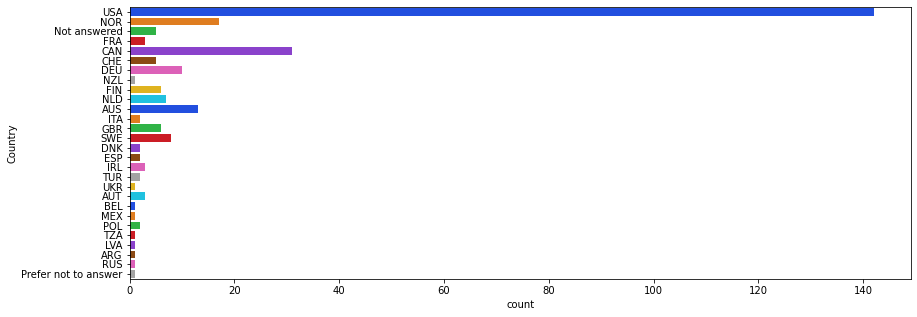

In [10]:
plt.figure(figsize=(14,5))
sns.countplot(data=data, y='Country', orient='h', palette='bright')

In [11]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [12]:
import plotly
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [13]:
plotly.__version__
# requires version >= 1.9.0

'4.14.3'

In [55]:
countries = data['Country'].value_counts().to_frame()
edit_countries = countries.drop(['Not answered', 'Prefer not to answer', 'USA'], axis=0)
edit_countries

,Country
CAN,31
NOR,17
AUS,13
DEU,10
SWE,8
NLD,7
GBR,6
FIN,6
CHE,5
AUT,3


In [56]:
data_countries = dict(type = 'choropleth',
                      colorscale='Plasma',
                      reversescale=True, 
                      locations = edit_countries.index,
                      locationmode = 'ISO-3',
                      z = edit_countries['Country'],
                      text = edit_countries['Country'],
                      colorbar = {'title': 'Demography of survey'}
                     )

layout = dict(title = 'Demography of survey',
             geo = dict(showframe = False,
                        projection = {'type': 'natural earth'} ))

In [58]:
chromap = go.Figure(data = [data_countries],
                    layout = layout)
plot(chromap, validate=False)

'temp-plot.html'

This is what we obtain, the plot it is not showed when uploading the notebook due to the library, you can choose to plot it here with ``iplot()`` or open a new window with ``plot()``

<img src="https://github.com/dan1dr/microdosing/blob/main/images/map1.png?raw=True" width="700" height="400">

**What is your age in years?**

(array([  7.,   0.,   0.,   0.,   0.,   0.,   0., 194.,  65.,  12.]),
 array([-99. , -82.8, -66.6, -50.4, -34.2, -18. ,  -1.8,  14.4,  30.6,
         46.8,  63. ]),
 <a list of 10 Patch objects>)

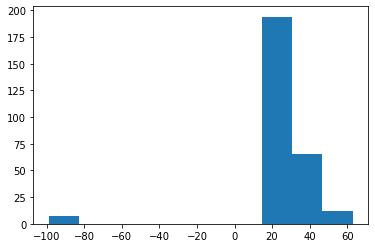

In [108]:
plt.hist(data['Age'])

Let's clean that negative ages (may be people which birth is to happen :D)

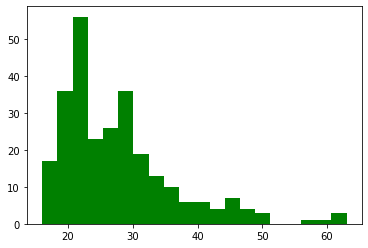

In [249]:
data = data.drop(data.loc[data['Age'] < 0].index)
plt.hist(data['Age'], bins=20, color='green');

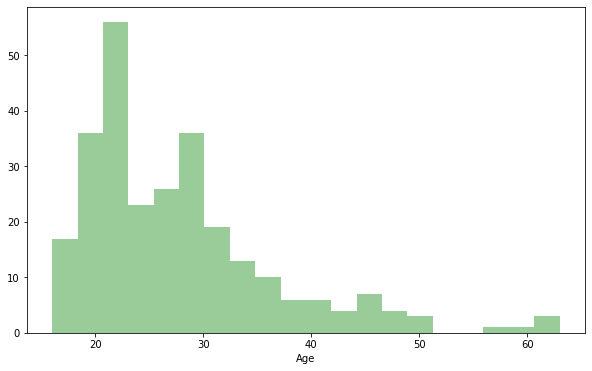

In [250]:
plt.figure(figsize=(10,6))
sns.distplot(data['Age'], bins=20, kde=False,
             color='green', axlabel='Age');

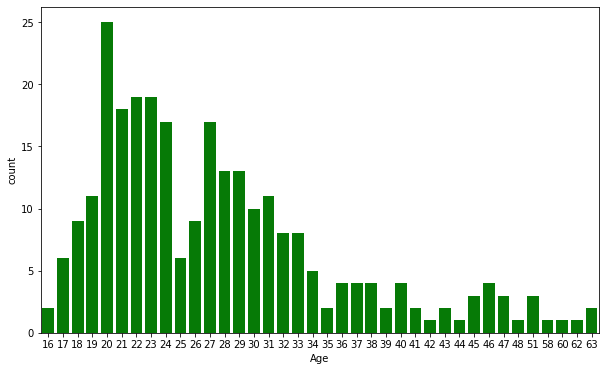

In [169]:
plt.figure(figsize=(10,6))
sns.countplot(data['Age'], color='green', saturation=0.9)

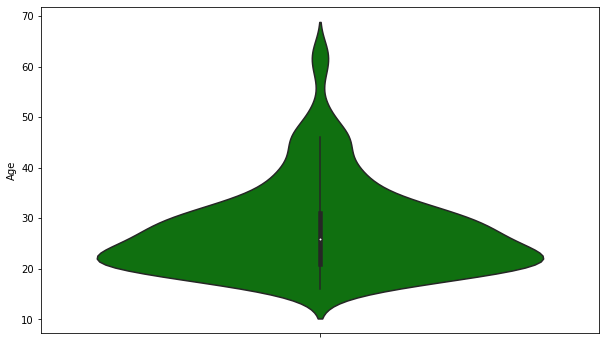

In [171]:
plt.figure(figsize=(10,6))
sns.violinplot(data['Age'], orient='v', color='green')

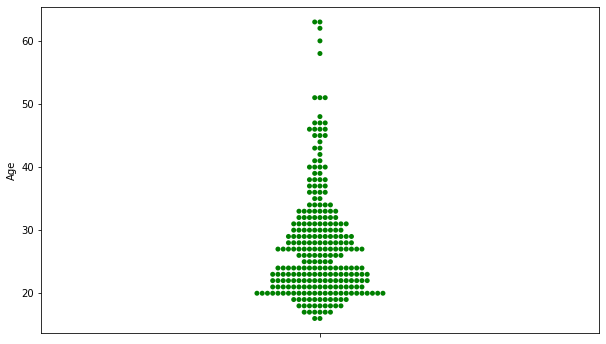

In [172]:
plt.figure(figsize=(10,6))
sns.swarmplot(data['Age'], orient='v', color='green')

**What is your gender?**

In [179]:
dict = {-1: 'Male', 1: 'Female'}
data.replace({"Gender": dict}, inplace=True)
data['Gender'].value_counts()

Male      237
Female     31
Name: Gender, dtype: int64

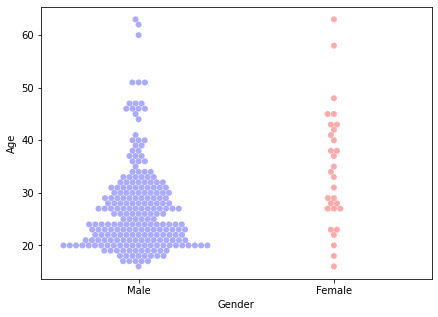

In [260]:
plt.figure(figsize=(7,5))
sns.swarmplot(x='Gender', y='Age', data=data, palette='bwr',
             order=['Male', 'Female'], size=6)

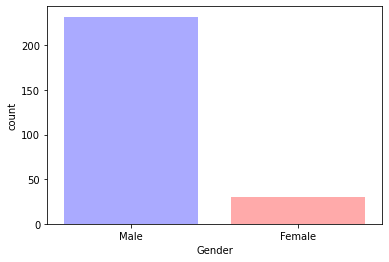

In [261]:
sns.countplot(x='Gender', data=data, palette='bwr',
              saturation=1)

In [272]:
data['Orientation'].value_counts()

Heterosexual    215
Homosexual       51
Name: Orientation, dtype: int64

**What is your sexual orientation?**

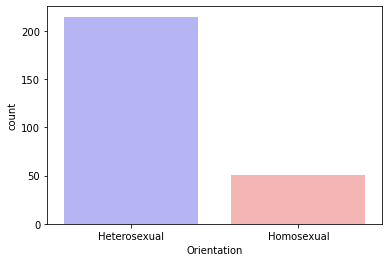

In [273]:
dict = {-1: 'Heterosexual', 1: 'Homosexual'}
data.replace({"Orientation": dict}, inplace=True)
sns.countplot(x='Orientation', data=data, palette='bwr')

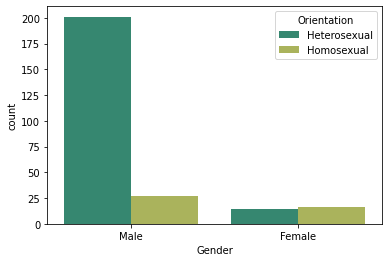

In [278]:
sns.countplot(x='Gender', data=data, hue='Orientation',
              palette='gist_earth', saturation=1)

As a curiosity, the number of homosexual people among females was much higher than in males

**What is your ethnic heritage?**

In [312]:
dict = {1: 'White', 8: 'European', 10: 'Mixed',
        13: 'Hispanic or Latino', 11: 'Other', 
        6: 'Middle Eastern', 4: 'East Asian',
        12: 'Prefer not to answer', 5: 'South Asian',
        2: 'Black' }
data.replace({'Ethnicity':dict}, inplace=True)

In [313]:
data['Ethnicity'].count()

271

In [317]:
data['Ethnicity'].value_counts()

White                   204
European                 24
Mixed                    14
Hispanic or Latino        9
Other                     6
Middle Eastern            6
East Asian                4
Prefer not to answer      2
Black                     1
South Asian               1
Name: Ethnicity, dtype: int64

In [321]:
data['Ethnicity'].value_counts()/data['Ethnicity'].count()*100
#Percentages

White                   75.276753
European                 8.856089
Mixed                    5.166052
Hispanic or Latino       3.321033
Other                    2.214022
Middle Eastern           2.214022
East Asian               1.476015
Prefer not to answer     0.738007
Black                    0.369004
South Asian              0.369004
Name: Ethnicity, dtype: float64

**What, if any, is your religious affilitation?**

In [326]:
dict = {1: 'Non-religious', 14: 'Spiritual but non-religious',
        2: 'Judaism', 7: 'Hinduism', 8: 'Buddhism', 9: 'Sihkism',
        3: 'Christianity', 4: 'Islam', 12: 'Other',
        13: 'Prefer not to answer'}
data.replace({'Religion': dict}, inplace=True)
data['Religion'].value_counts()

Non-religious                  157
Spiritual but non-religious     79
Other                           12
Christianity                     9
Buddhism                         8
Judaism                          4
Prefer not to answer             1
Hinduism                         1
Name: Religion, dtype: int64

In [339]:
a = data['Religion'].value_counts() / data['Religion'].count() *100
a

Non-religious                  57.933579
Spiritual but non-religious    29.151292
Other                           4.428044
Christianity                    3.321033
Buddhism                        2.952030
Judaism                         1.476015
Prefer not to answer            0.369004
Hinduism                        0.369004
Name: Religion, dtype: float64

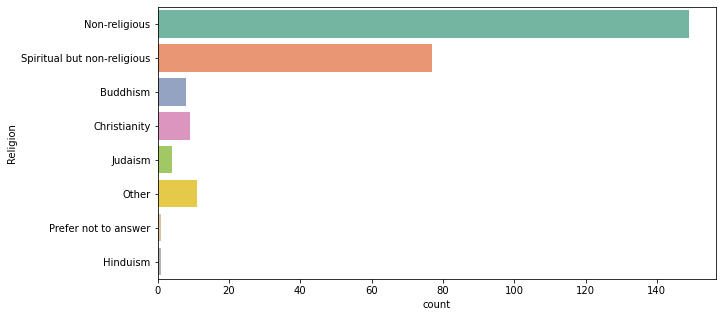

In [373]:
plt.figure(figsize=(10,5))
sns.countplot(y='Religion', data=data, orient='h', palette='Set2')

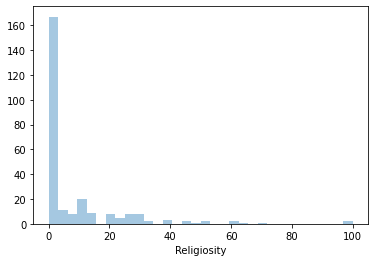

In [381]:
data = data.drop(data.loc[data['Religiosity'] < 0].index)
sns.distplot(data['Religiosity'], kde=False)

**Please use the bar to indicate how religious and spiritual consider yourself (from 0 to 100)?**

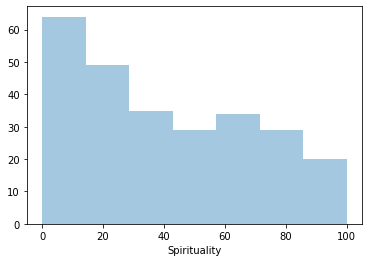

In [372]:
data = data.drop(data.loc[data['Spirituality'] < 0].index)
sns.distplot(data['Spirituality'], kde=False)

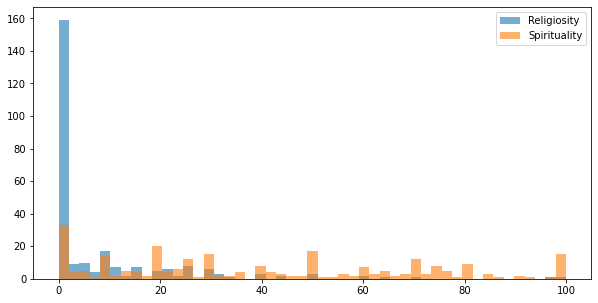

In [393]:
import numpy as np
plt.figure(figsize=(10,5))
x = data['Religiosity']
y = data['Spirituality']

bins = np.linspace(0, 100)

plt.hist(x, bins, alpha=0.6, label='Religiosity')
plt.hist(y, bins, alpha=0.6, label='Spirituality')
plt.legend(loc='upper right')
plt.show()

**What is your occupation? Please be general (e.g. "student", "software developer")**

Consult the [International Standard
Classifi cation of Occupations](https://www.ilo.org/wcmsp5/groups/public/---dgreports/---dcomm/---publ/documents/publication/wcms_172572.pdf) to see correspondences

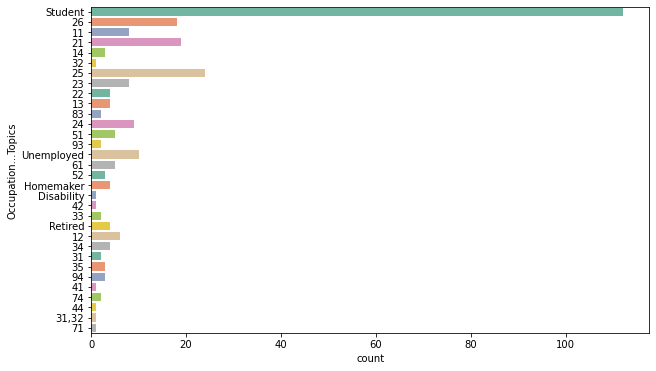

In [240]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, y=data['Occupation...Topics'], palette='Set2')

**What is your highest completed formal education?**

In [398]:
dict = {1: 'Doctoral', 2: 'Master', 3: 'Bachelor',
        4: 'Short-cycle tertiary education',
        5: 'Post-secondary non-tertiary education',
        6: 'Upper secondary education', 7 : 'Lower secondary education',
        9: 'Primary education', 10: 'Early childhood education', 
        8: 'Prefer not to answer'}
data.replace({'Education':dict}, inplace=True)
data['Education'].value_counts()

Upper secondary education                96
Short-cycle tertiary education           44
Bachelor                                 40
Lower secondary education                27
Post-secondary non-tertiary education    23
Doctoral                                 12
Prefer not to answer                      7
Master                                    5
0.0                                       2
Name: Education, dtype: int64

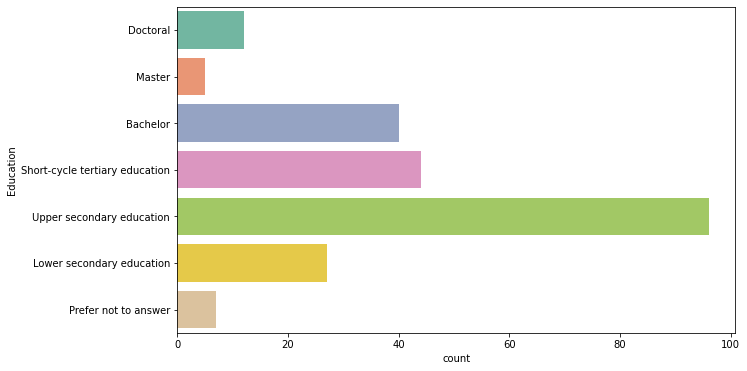

In [406]:
plt.figure(figsize=(10,6))
order = ['Doctoral', 'Master', 'Bachelor', 'Short-cycle tertiary education',
         'Upper secondary education', 'Lower secondary education', 'Prefer not to answer']
sns.countplot(y='Education', data=data, orient='h', palette='Set2', order=order)

**What is the social class of your household?**

In [411]:
dict = {3: 'Upper class', 2: 'Upper-middle class', 1: 'Middle class',
        0: 'Lower-middle class', -1: 'Skilled working class', -2: 'Working class',
        -3: 'Non-working class', 99: 'Prefer not to answer'}

data.replace({'SES': dict}, inplace=True)
data['SES'].value_counts()

Middle class             121
Upper-middle class        51
Lower-middle class        37
Skilled working class     17
Non-working class         16
Working class             15
Name: SES, dtype: int64

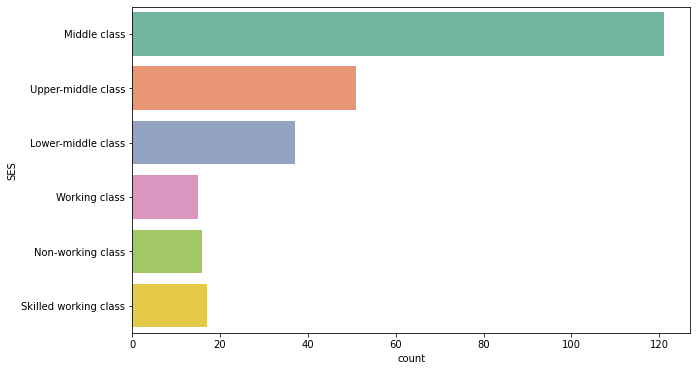

In [413]:
plt.figure(figsize=(10,6))
#order = ['Doctoral', 'Master', 'Bachelor', 'Short-cycle tertiary education',
sns.countplot(y='SES', data=data, orient='h', palette='Set2')